In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score,confusion_matrix, log_loss

In [2]:
df = pd.read_excel("C:\\data science class\\assignments\\Random Forest\\glass.xlsx", sheet_name="glass")
df1= pd.read_excel("C:\\data science class\\assignments\\Random Forest\\glass.xlsx")
print(df1)
df

   Prepare a model for glass classification using Random Forest
0                                   Data Description:          
1                               RI : refractive index          
2   Na: Sodium (unit measurement: weight percent i...          
3                                       Mg: Magnesium          
4                                        AI: Aluminum          
5                                         Si: Silicon          
6                                         K:Potassium          
7                                         Ca: Calcium          
8                                          Ba: Barium          
9                                            Fe: Iron          
10                                                NaN          
11             Type: Type of glass: (class attribute)          
12              1 -- building_windows_float_processed          
13           2 --building_windows_non_float_processed          
14                3 --vehicle_windows_fl

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [3]:
df.isnull().sum() # no null values
df.corr()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
RI,1.000000,-0.191885,-0.122274,-0.407326,-0.542052,-0.289833,0.810403,-0.000386,0.143010,-0.164237
Na,-0.191885,1.000000,-0.273732,0.156794,-0.069809,-0.266087,-0.275442,0.326603,-0.241346,0.502898
Mg,-0.122274,-0.273732,1.000000,-0.481799,-0.165927,0.005396,-0.443750,-0.492262,0.083060,-0.744993
Al,-0.407326,0.156794,-0.481799,1.000000,-0.005524,0.325958,-0.259592,0.479404,-0.074402,0.598829
Si,-0.542052,-0.069809,-0.165927,-0.005524,1.000000,-0.193331,-0.208732,-0.102151,-0.094201,0.151565
K,-0.289833,-0.266087,0.005396,0.325958,-0.193331,1.000000,-0.317836,-0.042618,-0.007719,-0.010054
Ca,0.810403,-0.275442,-0.443750,-0.259592,-0.208732,-0.317836,1.000000,-0.112841,0.124968,0.000952
Ba,-0.000386,0.326603,-0.492262,0.479404,-0.102151,-0.042618,-0.112841,1.000000,-0.058692,0.575161
Fe,0.143010,-0.241346,0.083060,-0.074402,-0.094201,-0.007719,0.124968,-0.058692,1.000000,-0.188278
Type,-0.164237,0.502898,-0.744993,0.598829,0.151565,-0.010054,0.000952,0.575161,-0.188278,1.000000


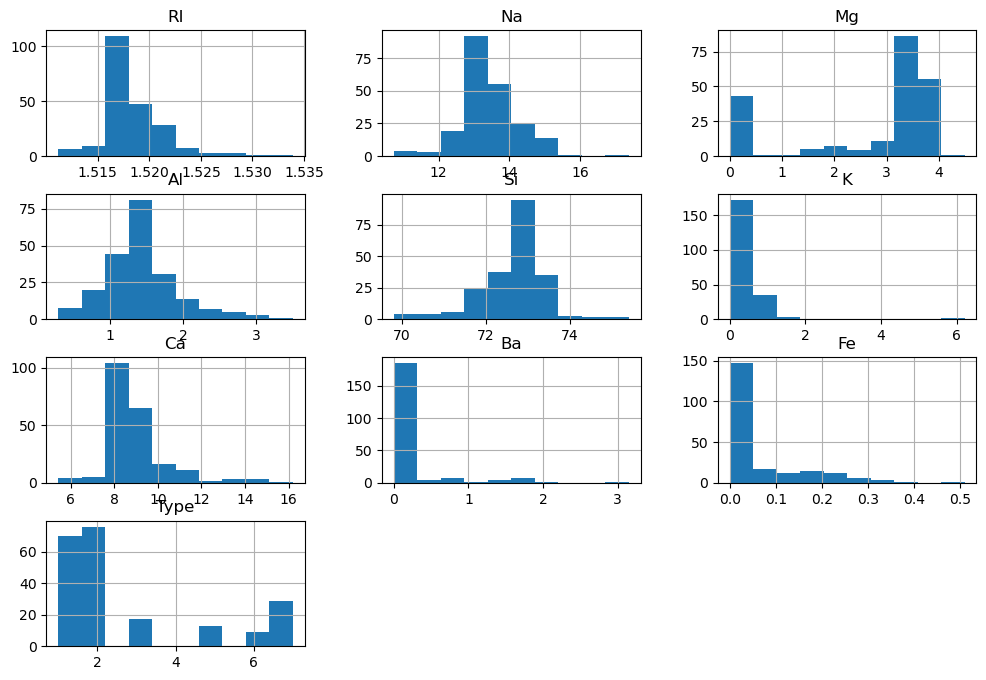

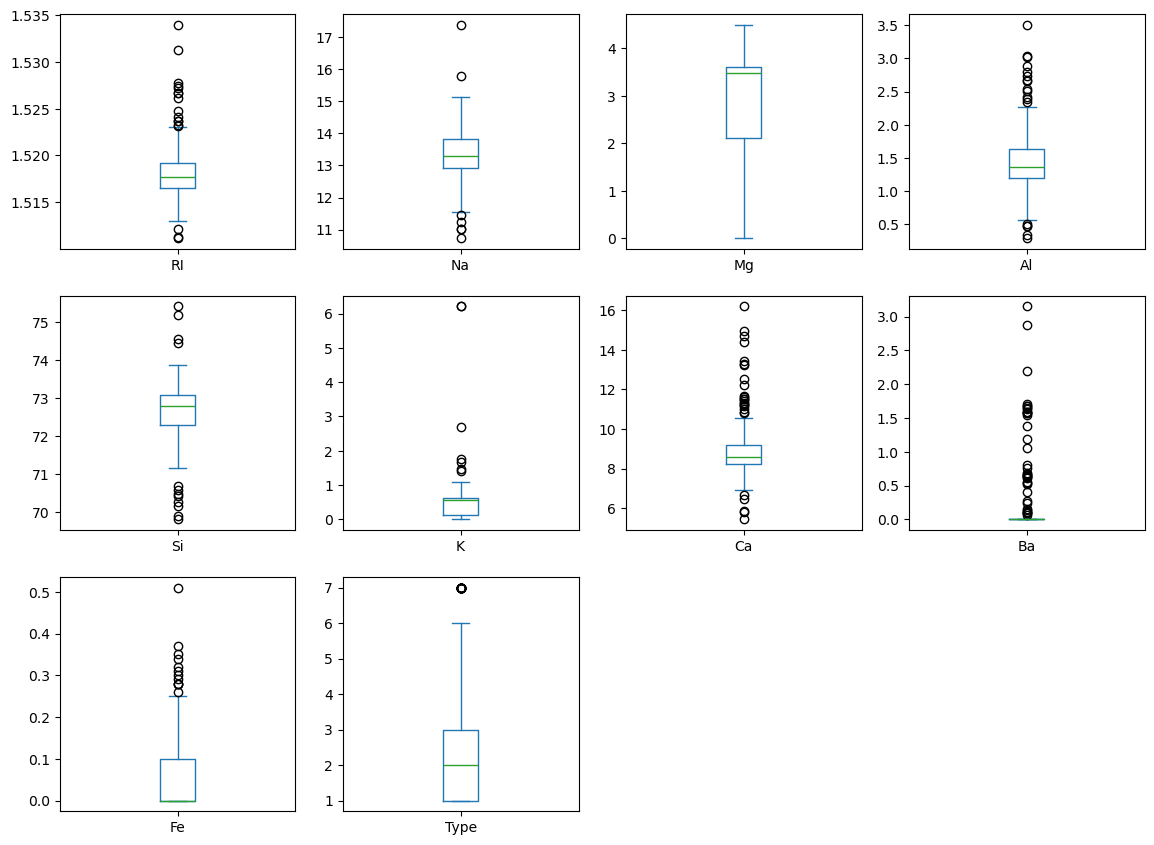

In [4]:
#Histogram
df.hist(figsize=(12,8))
plt.show()

# Boxplot
df.plot(kind='box', subplots=True, layout=(4,4),figsize=(14,14))
plt.show()

In [5]:
df_cleaned = df.copy()

for col in df.columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_cleaned = df_cleaned[(df_cleaned[col] >= lower_bound) & (df_cleaned[col] <= upper_bound)]
df_cleaned

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...
176,1.51905,14.00,2.39,1.56,72.37,0.00,9.57,0.0,0.0,6
177,1.51937,13.79,2.41,1.19,72.76,0.00,9.77,0.0,0.0,6
178,1.51829,14.46,2.24,1.62,72.38,0.00,9.26,0.0,0.0,6
179,1.51852,14.09,2.19,1.66,72.67,0.00,9.32,0.0,0.0,6


In [6]:
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()
x = df_cleaned.iloc[:,0:9]
ssx=SS.fit_transform(x)
ssx = pd.DataFrame(ssx)
ssx.columns=x.columns
ssx

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.835794,0.832792,1.951940,-0.879521,-1.873977,-2.077398,0.210063,0.0,-0.598819
1,-0.147828,1.348359,0.335031,0.057504,0.075285,-0.090110,-1.254994,0.0,-0.598819
2,-0.982116,0.605943,0.244193,0.706214,0.608767,-0.515957,-1.334617,0.0,-0.598819
3,-0.118657,-0.053983,0.498538,-0.194772,-0.170938,0.335738,-0.633937,0.0,-0.598819
4,-0.258677,0.069753,0.371366,-0.374969,0.793434,0.241105,-0.872805,0.0,-0.598819
...,...,...,...,...,...,...,...,...,...
131,0.692294,1.575209,-1.863240,0.778293,-0.663383,-2.361296,1.515875,0.0,-0.598819
132,0.878988,1.142132,-1.826905,-0.555166,0.136841,-2.361296,1.834366,0.0,-0.598819
133,0.248896,2.523852,-2.135753,0.994529,-0.642864,-2.361296,1.022215,0.0,-0.598819
134,0.383083,1.760813,-2.226591,1.138687,-0.047826,-2.361296,1.117762,0.0,-0.598819


In [7]:
#specify the features and target variables
df_cleaned.info()

X=ssx
Y=df_cleaned["Type"]

<class 'pandas.core.frame.DataFrame'>
Index: 136 entries, 0 to 181
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      136 non-null    float64
 1   Na      136 non-null    float64
 2   Mg      136 non-null    float64
 3   Al      136 non-null    float64
 4   Si      136 non-null    float64
 5   K       136 non-null    float64
 6   Ca      136 non-null    float64
 7   Ba      136 non-null    float64
 8   Fe      136 non-null    float64
 9   Type    136 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 11.7 KB


In [8]:
#Data Partition
from sklearn.model_selection import train_test_split
X_Train,X_Test, Y_Train,Y_Test=train_test_split(X,Y,test_size=0.2, random_state=42)


In [10]:
#model fitting
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_Train, Y_Train)


# Predictions
y_pred_train = model.predict(X_Train)
y_pred_test = model.predict(X_Test)

# Evaluation
print(confusion_matrix(Y_Train, y_pred_train))
print("accuracy_score", accuracy_score(Y_Train, y_pred_train))
print("f1score", f1_score(Y_Train, y_pred_train, average='weighted', zero_division=1))
print("precision score", precision_score(Y_Train, y_pred_train, average='weighted', zero_division=1))

print(confusion_matrix(Y_Test, y_pred_test))
print("accuracy_score", accuracy_score(Y_Test, y_pred_test))
print("f1score", f1_score(Y_Test, y_pred_test, average='weighted', zero_division=1))
print("precision score", precision_score(Y_Test, y_pred_test, average='weighted', zero_division=1))
print("recall score", recall_score(Y_Test, y_pred_test, average='weighted', zero_division=1))

from sklearn.metrics import classification_report
print(classification_report(Y_Train, y_pred_train))
print(classification_report(Y_Test, y_pred_test))

[[44  0  0  0  0]
 [ 0 46  0  0  0]
 [ 0  0 12  0  0]
 [ 0  0  0  2  0]
 [ 0  0  0  0  4]]
accuracy_score 1.0
f1score 1.0
precision score 1.0
[[12  3  0  0]
 [ 0  9  0  0]
 [ 1  2  0  0]
 [ 1  0  0  0]]
accuracy_score 0.75
f1score 0.6949025487256372
precision score 0.8086734693877551
recall score 0.75
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        44
           2       1.00      1.00      1.00        46
           3       1.00      1.00      1.00        12
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         4

    accuracy                           1.00       108
   macro avg       1.00      1.00      1.00       108
weighted avg       1.00      1.00      1.00       108

              precision    recall  f1-score   support

           1       0.86      0.80      0.83        15
           2       0.64      1.00      0.78         9
           3       0.00      0.00      0.00  

C:\Users\lenovo\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\lenovo\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\lenovo\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()

In [11]:
from sklearn.tree import DecisionTreeClassifier 

# Bagging Classifier
Bagg_model = AdaBoostClassifier(n_estimators=100, random_state=42, learning_rate= 0.1, 
                              estimator=DecisionTreeClassifier(criterion='gini'))
Bagg_model.fit(X_Train, Y_Train)

y_pred_train_Bagg = Bagg_model.predict(X_Train)
y_pred_test_Bagg = Bagg_model.predict(X_Test)

training_accuracy_Bagg = accuracy_score(Y_Train, y_pred_train_Bagg)
test_accuracy_Bagg = accuracy_score(Y_Test, y_pred_test_Bagg)

print("AdaAdaAdaBoosting Training Accuracy:", training_accuracy_Bagg)
print("AdaAdaboosting Test Accuracy:", test_accuracy_Bagg)

AdaAdaAdaBoosting Training Accuracy: 1.0
AdaAdaboosting Test Accuracy: 0.7142857142857143


In [83]:
1.Bagging
Bagging builds multiple independent models in parallel and then aggregates their outputs to reduce variance and prevent overfitting.
Take random samples with replacement from training data
Train individual models (usually decision trees) on each sample in parallel.
Random Forest is a popular bagging method used decision trees.

Boosting
Boosting builds models sequentially, where each new model focuses on correcting the errors made by the previous ones.
Start with a weak model and Measure its errors
Train the next model to focus more on the misclassified or high-error samples.
Reduces bias and improves accuracy.
types- AdaBoost
       Gradient Boosting
       XGBoost, LightGBM, CatBoost

2.handle imbalance in the data.
    1. Resampling- undersampling and over sampling
     when samples is too less to conduct Machine learning model building so duplicate less samples and make more sample to build the model
     when samples is too much to conduct Machine learning model building so remove the samples randomly and build the model
    2.Use of Proper Evaluation Metrics
     Accuracy is misleading in imbalanced data.

SyntaxError: invalid decimal literal (2159366848.py, line 1)